# Ambiente

In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Carregamento dos Dados

In [266]:
# Carregar o dataset enviado
df = pd.read_csv('https://viagens-ml.s3.sa-east-1.amazonaws.com/dataset_viagens_brasil.csv')

In [267]:
df.head()

,Idade,Cidade_Origem,Custo_Desejado,Prefere_Praia,Prefere_Natureza,Prefere_Cultura,Prefere_Festas,Prefere_Gastronomia,Prefere_Compras,Cidade_Destino
0,23.0,Campo Grande,9000.0,4,3.0,1,5.0,1.0,3,Porto Seguro
1,33.0,Rio Branco,NaN,4,5.0,3,5.0,5.0,5,Balneário Camboriú
2,46.0,Rio Branco,2900.0,5,4.0,5,4.0,2.0,2,Porto Seguro
3,20.0,São Luís,2900.0,5,3.0,4,3.0,5.0,4,Porto Seguro
4,37.0,Teresina,1700.0,3,3.0,4,2.0,1.0,1,Fernando de Noronha


In [268]:
# Tipos Antes de Tratamento de Valores Sabotados
print(df.dtypes)

Idade                  float64
Cidade_Origem           object
Custo_Desejado         float64
Prefere_Praia           object
Prefere_Natureza       float64
Prefere_Cultura         object
Prefere_Festas         float64
Prefere_Gastronomia    float64
Prefere_Compras         object
Cidade_Destino          object
dtype: object


In [269]:
print("Valores nulos por coluna:")
print(df.isnull().sum())

Valores nulos por coluna:
Idade                  497
Cidade_Origem            0
Custo_Desejado         497
Prefere_Praia            0
Prefere_Natureza       400
Prefere_Cultura          0
Prefere_Festas         400
Prefere_Gastronomia    400
Prefere_Compras          0
Cidade_Destino           0
dtype: int64


### O QUE FOR NULL NAS 5 COLUNAS ARRANCA FORA

# Tratamento de Valores Sabotados

In [270]:
for col in df.columns:
    print(f"Valores únicos em '{col}':")
    print(df[col].unique())
    print("----")

Valores únicos em 'Idade':
[ 23.  33.  46.  20.  37.  53.  36.  43.  49.  24.  69.  58.  50.  57.
  56.  35. 190.  28.  45.  42.  67.  40.  48.  47.  59.  52.  nan  65.
  66.  19.  18.  29.  22.  54.  26.  41.  25.  55.  63.  21.  31.  38.
  34.  39.  62.  68.  44.  51.  64.  61.  70.  60.  30.  32.  27.]
----
Valores únicos em 'Cidade_Origem':
['Campo Grande' 'Rio Branco' 'São Luís' 'Teresina' 'João Pessoa' 'Maceió'
 'Recife' 'Vitória' 'Porto Velho' 'Aracaju' 'Goiânia' 'Porto Alegre'
 'Natal' 'Cuiabá' 'Fortaleza' 'Florianópolis' 'Belém' 'Brasília'
 'Boa Vista' 'Curitiba' 'Rio de Janeiro' 'Macapá' 'Manaus' 'São Paulo'
 'Palmas' 'Salvador' 'Belo Horizonte']
----
Valores únicos em 'Custo_Desejado':
[  9000.     nan   2900.   1700.   7100.   2200.   5200.   4400.   3500.
   3100.   9400.   5700.  10300.   2800.   4900.   2500.   9600.   5800.
   3400.  15200.   3200.   1300.   5100. 400000.   7000.   3000.  11000.
  11900.   2700.   3800.   4600.   5400.   6200.  12100.   4000.   5300.
  

### Tratamento de Valores Sabotados nas Colunas `Prefere_`

In [271]:
# Gera a lista de colunas que começam com "Prefere_"
cols_prefere = [col for col in df.columns if col.startswith("Prefere_")]

for col in cols_prefere:
    # substitui "cinco" por 5 e "erro" por NaN
    df[col] = df[col].replace({'cinco': '5', 'erro': np.nan})

    # Converte para numérico (garante que '1', '2'... virem inteiros)
    df[col] = pd.to_numeric(df[col], errors='coerce')

    # Preenche NaNs com a mediana da coluna
    df[col] = df[col].fillna(df[col].median())

    # Converte para inteiro
    df[col] = df[col].astype('int32')

    # Mostra tipo final e valores únicos
    print(f"{col}: {df[col].dtype}, valores únicos: {df[col].unique()}")

Prefere_Praia: int32, valores únicos: [4 5 3 2 1]
Prefere_Natureza: int32, valores únicos: [3 5 4 1 2]
Prefere_Cultura: int32, valores únicos: [1 3 5 4 2]
Prefere_Festas: int32, valores únicos: [5 4 3 2 1]
Prefere_Gastronomia: int32, valores únicos: [1 5 2 4 3]
Prefere_Compras: int32, valores únicos: [3 5 2 4 1]


### Transformação de Tipo de Dados nas Colunas `Cidade_Origem` e `Cidade_Destino` 

In [272]:
le_cidade_destino = LabelEncoder()

df['Cidade_Destino'] = le_cidade_destino.fit_transform(df['Cidade_Destino'])
cidades_originais = le_cidade_destino.inverse_transform(df['Cidade_Destino'])

# Tratamento de Valores Nulos

In [273]:
print("Valores nulos por coluna:")
print(df.isnull().sum())

Valores nulos por coluna:
Idade                  497
Cidade_Origem            0
Custo_Desejado         497
Prefere_Praia            0
Prefere_Natureza         0
Prefere_Cultura          0
Prefere_Festas           0
Prefere_Gastronomia      0
Prefere_Compras          0
Cidade_Destino           0
dtype: int64


In [274]:
# Verifica se os nulos de Idade e Custo_Desejado coincidem
nulos_idade = df["Idade"].isnull()
nulos_custo = df["Custo_Desejado"].isnull()

# Linhas com ambos nulos
linhas_ambos = df[nulos_idade & nulos_custo]
print("Linhas com Idade e Custo_Desejado nulos ao mesmo tempo:", linhas_ambos.shape[0])

Linhas com Idade e Custo_Desejado nulos ao mesmo tempo: 16


In [275]:
# Remover linhas com ambas colunas nulas
df = df[~(df["Idade"].isnull() & df["Custo_Desejado"].isnull())]

In [276]:
# Preencher os nulos restantes com mediana de cada coluna
df["Idade"] = df["Idade"].fillna(df["Idade"].median())
df["Custo_Desejado"] = df["Custo_Desejado"].fillna(df["Custo_Desejado"].median())

# Verificação final
print("Valores nulos por coluna após tratamento:")
print(df.isnull().sum())

Valores nulos por coluna após tratamento:
Idade                  0
Cidade_Origem          0
Custo_Desejado         0
Prefere_Praia          0
Prefere_Natureza       0
Prefere_Cultura        0
Prefere_Festas         0
Prefere_Gastronomia    0
Prefere_Compras        0
Cidade_Destino         0
dtype: int64


# Tratamento de Outliers

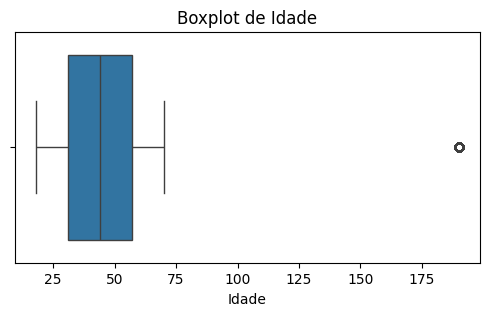

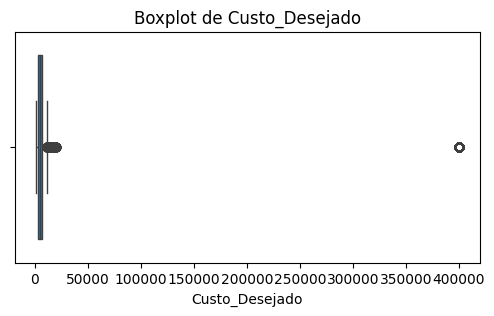

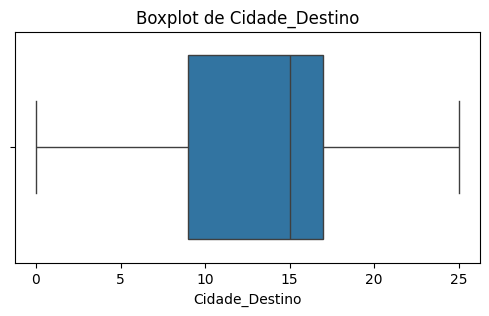

In [277]:
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")
    plt.show()

### SUBSTITUIR 2 PONTOS DE OUTLIERS POR MÉDIA

### BALANCEAMENTO DA CLASSE ALVO